<a href="https://colab.research.google.com/github/Sumin0411/SKTFlyAI/blob/main/04_nn_multi_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 뉴럴네트워크 다중분류
- mnist dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### 1.데이터준비

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [4]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [5]:
samples = np.random.randint(60000, size=16)
samples

array([15372, 35616, 53011,  1776, 52446, 29220, 50252, 32012,  3108,
       24499, 48094, 24390, 29278,  5895, 38893, 13236])

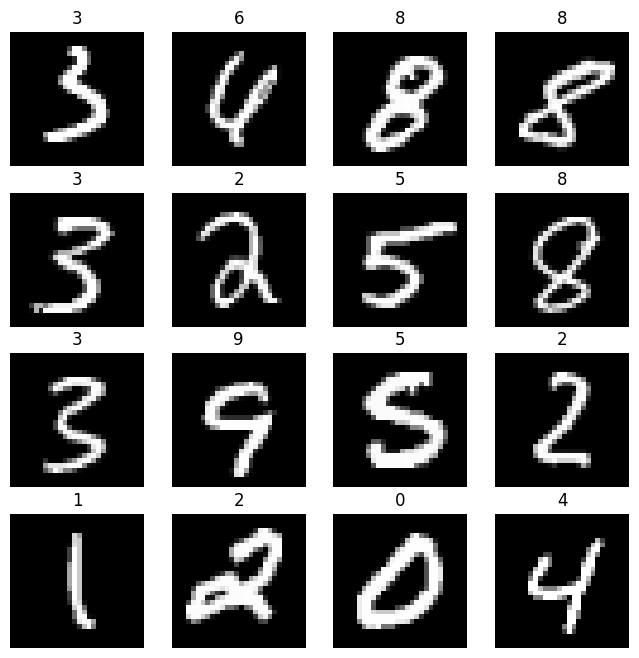

In [6]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
  plt.subplot(4, 4, 1+i)
  plt.imshow(X_train[idx], cmap='gray')
  plt.axis('off')
  plt.title(y_train[idx])
plt.show()

#### 검증데이터 분리

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

#### 정규화
- 최대 최소 정규화

In [8]:
X_train_s = X_train.astype('float32')/255.
X_val_s = X_val.astype('float32')/255.

In [9]:
np.max(X_train_s), np.min(X_train_s)

(1.0, 0.0)

- 레이블(타겟)값 원핫인코딩

In [10]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

y_train_o[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

- Flatten

In [11]:
X_train_s = X_train_s.reshape(-1, 28*28)
X_val_s = X_val_s.reshape(-1, 28*28)

### 2.모델만들기

In [12]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=64, activation='relu', input_shape=(28*28, )),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###3.학습

In [14]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(
    X_train_s, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (X_val_s, y_val_o),
    verbose = 1
)

Epoch 1/10
1500/1500 [==============================] - 15s 8ms/step - loss: 0.3263 - accuracy: 0.9052 - val_loss: 0.1649 - val_accuracy: 0.9513
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1435 - accuracy: 0.9568 - val_loss: 0.1331 - val_accuracy: 0.9603
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1058 - accuracy: 0.9678 - val_loss: 0.1083 - val_accuracy: 0.9659
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0824 - accuracy: 0.9746 - val_loss: 0.1086 - val_accuracy: 0.9674
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0681 - accuracy: 0.9785 - val_loss: 0.1056 - val_accuracy: 0.9672
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0570 - accuracy: 0.9819 - val_loss: 0.1014 - val_accuracy: 0.9711
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.1044 - val_accuracy

In [16]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.show()

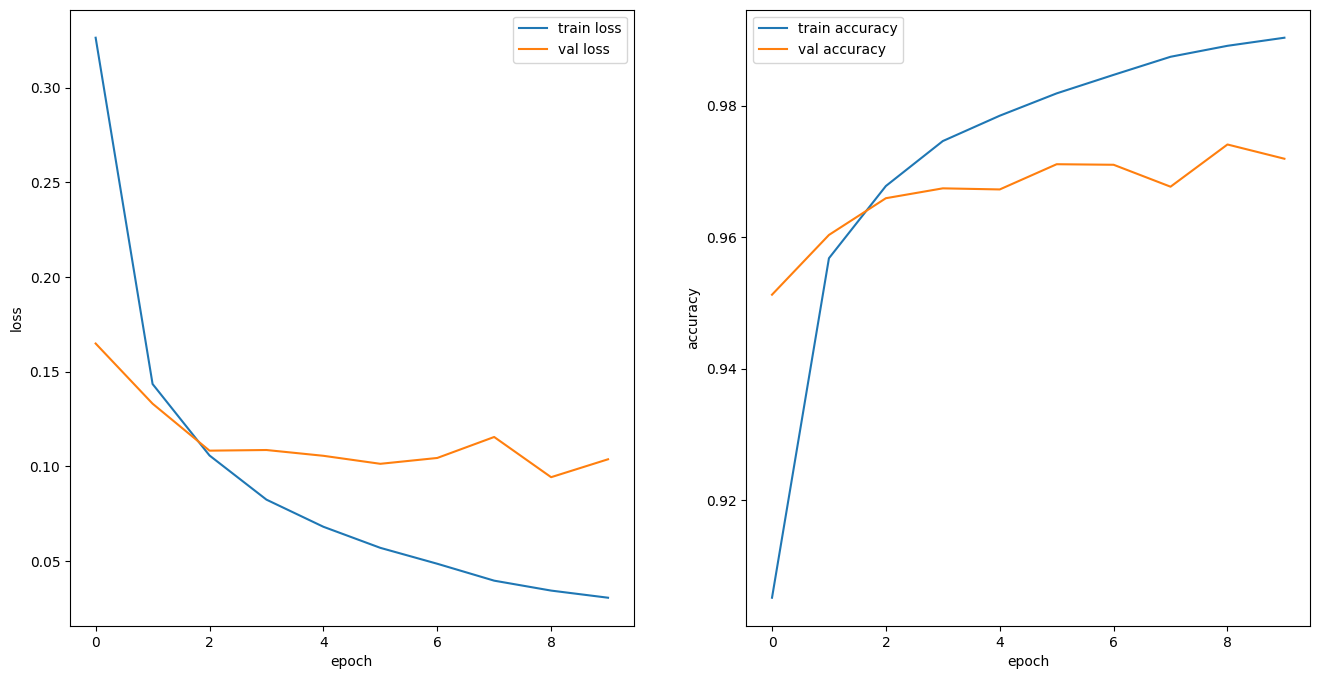

In [17]:
 plot_history(history)

### 4.평가

- 테스트 데이터 정리
    - 정규화
    - 차원 변경
    - y값 원핫인코딩

In [18]:
X_test_s = X_test.astype('float32')/255.
X_test_s = X_test_s.reshape(-1, 28*28)

y_test_o = to_categorical(y_test)

### 예측

In [19]:
y_pred = model.predict(X_test_s)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.12746501e-09, 1.23401928e-10, 5.78360559e-09, 1.45522963e-05,
        1.91284738e-10, 1.85689020e-10, 8.88303039e-16, 9.99924004e-01,
        3.06970094e-08, 6.13010052e-05],
       [2.99601229e-15, 8.22480359e-08, 9.99999821e-01, 4.57136377e-11,
        4.30683322e-19, 2.11306017e-17, 7.02250071e-15, 1.06725965e-14,
        7.65967151e-14, 6.51126531e-25],
       [2.48472620e-09, 9.99800920e-01, 1.22738402e-05, 6.62038104e-08,
        7.67428162e-07, 1.35284306e-09, 3.63465098e-08, 1.81807700e-04,
        3.99350529e-06, 3.58710706e-09],
       [9.99999821e-01, 2.82856776e-14, 1.06058920e-07, 9.55660620e-11,
        5.80947552e-16, 2.46266636e-12, 2.44805953e-08, 1.70660874e-10,
        3.10863023e-14, 4.44014200e-11],
       [9.45379441e-07, 1.86976172e-12, 2.22038343e-09, 1.90739077e-10,
        9.96554434e-01, 1.70215522e-08, 4.87560348e-09, 7.41365568e-07,
        2.65372591e-07, 3.44361225e-03]], dtype=float32)

In [20]:
y_pred = np.argmax(y_pred,axis=1)

In [21]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

def print_metrics(y_test, y_pred):
  print(f'accuracy  : {accuracy_score(y_test, y_pred)}')
  print(f'recall : {recall_score(y_test, y_pred, average="macro")}')
  print(f'precision : {precision_score(y_test, y_pred, average="macro")}')

In [23]:
print_metrics(y_test, y_pred)

accuracy  : 0.9739
recall : 0.9735312869364472
precision : 0.9740535327994142


- 오답확인

In [24]:
samples = np.where(y_test != y_pred)[0]
samples = np.random.choice(samples, 9)
samples

array([1955, 2070,  720, 4212, 5891, 3567, 4123, 1247, 6555])

### 6. 모델 저장
* keras 모델 형식으로 저장

In [25]:
model.save('nn-mnist-28*28-97.keras')

* tensorflow 방식 저장

In [26]:
model.save('my_model')

### 7. 모델 로딩

In [27]:
loaded_model = keras.models.load_model('nn-mnist-28*28-97.keras')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
